In [2]:
default_installations = True
if default_installations:
    !pip -q install langchain langchain-community
    !pip -q install sentence_transformers
    !pip -q install faiss-cpu
else:
    import requests

    text_file_path = "requirements__Ch8_Setting_Up_LangChain_Configurations_and_Pipeline.txt"
    url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-NLP-from-Foundations-to-LLMs/main/Chapter8_notebooks/" + text_file_path
    res = requests.get(url)
    with open(text_file_path, "w") as f:
        f.write(res.text)
    !pip install -r requirements__Ch8_Setting_Up_LangChain_Configurations_and_Pipeline.txt

In [3]:
import requests
import textwrap
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

/opt/anaconda3/envs/pyconda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
text_file_path = "mocked_up_physician_records.csv"
url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-NLP-from-Foundations-to-LLMs/main/Chapter8_notebooks/" + text_file_path
res = requests.get(url)
with open(text_file_path, "w") as f:
    f.write(res.text)

In [5]:
print(res.text[2000:4000])

 chief complaint, Ms. Thompson describes the fatigue as persistent and overwhelming, affecting her ability to perform daily activities. She rates her fatigue as 8 out of 10 in severity. Additionally, she reports joint pain primarily in her knees and wrists, which is worse in the morning and improves with movement throughout the day. She denies any swelling or redness in the affected joints.

Given the clinical presentation, further investigation will be carried out to explore potential causes for Ms. Thompson's fatigue and joint pain. This may include laboratory tests, imaging studies, and consultation with specialists as necessary."
"Title: Mocked up record
Physician Name: Dr. ABC
Date: November 28, 2099
Patient ID: 987654321
Chief Complaint: Migraine Headaches

History of Present Illness:
Title: Mocked up record
The patient, Mr. Michael Johnson, a 40-year-old male, presents today with a chief complaint of recurring migraine headaches. He is married and lives with his spouse and two c

In [6]:
text_file_path = "mocked_up_physician_records_ko.csv"
url = "https://raw.githubusercontent.com/corazzon/Mastering-NLP-from-Foundations-to-LLMs/refs/heads/main/Chapter8_notebooks/" + text_file_path
res = requests.get(url)
with open(text_file_path, "w") as f:
    f.write(res.text)

In [7]:
print(res.text[:4000])

"Title: Mocked up record
담당의: ABC 의사
날짜: 2099년 6월 25일
환자 ID: 987654321
주 증상: 복통
현재 질환 이력:
환자 John Anderson 씨(42세, 남성)는 복통을 주 증상으로 내원하였습니다. 기혼자로 아내와 두 자녀와 함께 살고 있습니다. Anderson 씨는 약 2주 전 유럽 출장에서 돌아왔으며, 여행 중 호흡기 증상이나 아픈 사람과의 접촉은 없었다고 합니다.
진료 중 Anderson 씨는 아버지가 60대에 심근경색을 앓은 심혈관 질환 가족력이 있으며, 외할머니는 제2형 당뇨병을 앓았다고 밝혔습니다. 본인은 만성 질환, 수술 경험이나 입원 이력은 없다고 합니다.
주 증상에 대해 Anderson 씨는 우하복부에 둔하고 간헐적인 통증이 있으며, 통증 강도는 10점 만점에 5점 정도라고 설명합니다. 신체 활동 시 통증이 악화되고 식사 후에도 더 심해지는 경향이 있습니다. 구역질, 구토, 배변 습관의 변화와 같은 관련 증상은 없다고 합니다.
제공된 정보를 바탕으로 Anderson 씨의 복통 원인을 파악하기 위한 추가 평가와 진단 검사가 진행될 예정입니다."
"Title: Mocked up record
담당의: ABC 의사
날짜: 2099년 11월 15일
환자 ID: 123456789
주 증상: 피로감과 관절통
현재 질환 이력:
환자 Sarah Thompson 씨(57세, 여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 거주 중인 미망인으로, 최근 해외여행 이력은 없습니다.
진료 중 Thompson 씨는 자매가 류마티스 관절염 진단을 받은 자가면역 질환 가족력이 있다고 밝혔습니다. 또한 본인은 갑상선 기능 저하증이 있어 갑상선 호르몬 대체 요법으로 관리 중이라고 합니다.
주 증상에 대해 Thompson 씨는 일상 활동에 지장을 줄 정도로 지속적이고 심한 피로감을 느끼며, 그 정도는 10점 만점에 8점이라고 표현했습니다. 또한 주로 무릎과 손목에 관절통이 있는데, 아침에 더 심하고 하루 중 활동하면서 점

In [8]:
text_loader = TextLoader(text_file_path)
documents = text_loader.load()
documents

[Document(metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='"Title: Mocked up record\n담당의: ABC 의사\n날짜: 2099년 6월 25일\n환자 ID: 987654321\n주 증상: 복통\n현재 질환 이력:\n환자 John Anderson 씨(42세, 남성)는 복통을 주 증상으로 내원하였습니다. 기혼자로 아내와 두 자녀와 함께 살고 있습니다. Anderson 씨는 약 2주 전 유럽 출장에서 돌아왔으며, 여행 중 호흡기 증상이나 아픈 사람과의 접촉은 없었다고 합니다.\n진료 중 Anderson 씨는 아버지가 60대에 심근경색을 앓은 심혈관 질환 가족력이 있으며, 외할머니는 제2형 당뇨병을 앓았다고 밝혔습니다. 본인은 만성 질환, 수술 경험이나 입원 이력은 없다고 합니다.\n주 증상에 대해 Anderson 씨는 우하복부에 둔하고 간헐적인 통증이 있으며, 통증 강도는 10점 만점에 5점 정도라고 설명합니다. 신체 활동 시 통증이 악화되고 식사 후에도 더 심해지는 경향이 있습니다. 구역질, 구토, 배변 습관의 변화와 같은 관련 증상은 없다고 합니다.\n제공된 정보를 바탕으로 Anderson 씨의 복통 원인을 파악하기 위한 추가 평가와 진단 검사가 진행될 예정입니다."\n"Title: Mocked up record\n담당의: ABC 의사\n날짜: 2099년 11월 15일\n환자 ID: 123456789\n주 증상: 피로감과 관절통\n현재 질환 이력:\n환자 Sarah Thompson 씨(57세, 여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 거주 중인 미망인으로, 최근 해외여행 이력은 없습니다.\n진료 중 Thompson 씨는 자매가 류마티스 관절염 진단을 받은 자가면역 질환 가족력이 있다고 밝혔습니다. 또한 본인은 갑상선 기능 저하증이 있어 갑상선 호르몬 대체 요법으로 관리 중이라고 합니다.\n주 증상에 대해 Thompson 씨는 일상 활동에 지장

In [9]:
print(type(documents[0]))

<class 'langchain_core.documents.base.Document'>


In [10]:
print(documents[0].page_content[0:200])

"Title: Mocked up record
담당의: ABC 의사
날짜: 2099년 6월 25일
환자 ID: 987654321
주 증상: 복통
현재 질환 이력:
환자 John Anderson 씨(42세, 남성)는 복통을 주 증상으로 내원하였습니다. 기혼자로 아내와 두 자녀와 함께 살고 있습니다. Anderson 씨는 약 2주 전 유럽 출장에서 돌아왔으며, 


In [11]:
print(documents[0].page_content[200:400])

여행 중 호흡기 증상이나 아픈 사람과의 접촉은 없었다고 합니다.
진료 중 Anderson 씨는 아버지가 60대에 심근경색을 앓은 심혈관 질환 가족력이 있으며, 외할머니는 제2형 당뇨병을 앓았다고 밝혔습니다. 본인은 만성 질환, 수술 경험이나 입원 이력은 없다고 합니다.
주 증상에 대해 Anderson 씨는 우하복부에 둔하고 간헐적인 통증이 있으며, 통증 강


In [12]:
split_text_by = '"Title: Mocked up record'
chunk_size = 700
chunk_overlap = 0

In [13]:
text_splitter = CharacterTextSplitter(chunk_size=chunk_size,
                                      chunk_overlap=chunk_overlap,
                                      separator=split_text_by)
splitted_docs = text_splitter.split_documents(documents)
splitted_docs

[Document(metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='담당의: ABC 의사\n날짜: 2099년 6월 25일\n환자 ID: 987654321\n주 증상: 복통\n현재 질환 이력:\n환자 John Anderson 씨(42세, 남성)는 복통을 주 증상으로 내원하였습니다. 기혼자로 아내와 두 자녀와 함께 살고 있습니다. Anderson 씨는 약 2주 전 유럽 출장에서 돌아왔으며, 여행 중 호흡기 증상이나 아픈 사람과의 접촉은 없었다고 합니다.\n진료 중 Anderson 씨는 아버지가 60대에 심근경색을 앓은 심혈관 질환 가족력이 있으며, 외할머니는 제2형 당뇨병을 앓았다고 밝혔습니다. 본인은 만성 질환, 수술 경험이나 입원 이력은 없다고 합니다.\n주 증상에 대해 Anderson 씨는 우하복부에 둔하고 간헐적인 통증이 있으며, 통증 강도는 10점 만점에 5점 정도라고 설명합니다. 신체 활동 시 통증이 악화되고 식사 후에도 더 심해지는 경향이 있습니다. 구역질, 구토, 배변 습관의 변화와 같은 관련 증상은 없다고 합니다.\n제공된 정보를 바탕으로 Anderson 씨의 복통 원인을 파악하기 위한 추가 평가와 진단 검사가 진행될 예정입니다."'),
 Document(metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='담당의: ABC 의사\n날짜: 2099년 11월 15일\n환자 ID: 123456789\n주 증상: 피로감과 관절통\n현재 질환 이력:\n환자 Sarah Thompson 씨(57세, 여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 거주 중인 미망인으로, 최근 해외여행 이력은 없습니다.\n진료 중 Thompson 씨는 자매가 류마티스 관절염 진단을 받은 자가면역 질환 가족력이 있다고 밝혔습니다. 또한 본인은 갑상선 기능 저하증이 있어 갑상선 호르몬 대체 요법으로 관리 중이라고 합니다

In [14]:
len(splitted_docs)

4

In [15]:
print(splitted_docs[0].page_content)

담당의: ABC 의사
날짜: 2099년 6월 25일
환자 ID: 987654321
주 증상: 복통
현재 질환 이력:
환자 John Anderson 씨(42세, 남성)는 복통을 주 증상으로 내원하였습니다. 기혼자로 아내와 두 자녀와 함께 살고 있습니다. Anderson 씨는 약 2주 전 유럽 출장에서 돌아왔으며, 여행 중 호흡기 증상이나 아픈 사람과의 접촉은 없었다고 합니다.
진료 중 Anderson 씨는 아버지가 60대에 심근경색을 앓은 심혈관 질환 가족력이 있으며, 외할머니는 제2형 당뇨병을 앓았다고 밝혔습니다. 본인은 만성 질환, 수술 경험이나 입원 이력은 없다고 합니다.
주 증상에 대해 Anderson 씨는 우하복부에 둔하고 간헐적인 통증이 있으며, 통증 강도는 10점 만점에 5점 정도라고 설명합니다. 신체 활동 시 통증이 악화되고 식사 후에도 더 심해지는 경향이 있습니다. 구역질, 구토, 배변 습관의 변화와 같은 관련 증상은 없다고 합니다.
제공된 정보를 바탕으로 Anderson 씨의 복통 원인을 파악하기 위한 추가 평가와 진단 검사가 진행될 예정입니다."


In [16]:
print(splitted_docs[1].page_content)

담당의: ABC 의사
날짜: 2099년 11월 15일
환자 ID: 123456789
주 증상: 피로감과 관절통
현재 질환 이력:
환자 Sarah Thompson 씨(57세, 여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 거주 중인 미망인으로, 최근 해외여행 이력은 없습니다.
진료 중 Thompson 씨는 자매가 류마티스 관절염 진단을 받은 자가면역 질환 가족력이 있다고 밝혔습니다. 또한 본인은 갑상선 기능 저하증이 있어 갑상선 호르몬 대체 요법으로 관리 중이라고 합니다.
주 증상에 대해 Thompson 씨는 일상 활동에 지장을 줄 정도로 지속적이고 심한 피로감을 느끼며, 그 정도는 10점 만점에 8점이라고 표현했습니다. 또한 주로 무릎과 손목에 관절통이 있는데, 아침에 더 심하고 하루 중 활동하면서 점차 나아진다고 합니다. 관절 부위의 붓기나 붉어짐은 없다고 합니다.
임상 소견을 바탕으로 Thompson 씨의 피로감과 관절통의 원인을 찾기 위한 추가 검사가 필요합니다. 혈액 검사, 영상 검사 및 필요시 전문의 상담을 진행할 예정입니다."


In [17]:
print(splitted_docs[2].page_content)

담당의: ABC 의사
날짜: 2099년 11월 28일
환자 ID: 987654321
주 증상: 편두통
현재 질환 이력:
환자 Michael Johnson 씨(40세, 남성)는 반복되는 편두통을 주 증상으로 내원하였습니다. 기혼자로 배우자와 두 자녀와 함께 살고 있으며, 최근 지역 외 여행은 하지 않았습니다.
진료 중 Johnson 씨는 어머니와 여동생도 비슷한 증상의 편두통을 앓고 있는 가족력이 있다고 밝혔습니다. 중요한 과거 병력, 수술이나 입원 경험은 없다고 합니다. 업무가 바빠 가끔 스트레스를 받고 수면 패턴이 불규칙하다고 언급했습니다.
주 증상에 대해 Johnson 씨는 주로 머리 한쪽에 중간에서 심한 정도의 욱신거리는 통증이 반복적으로 나타난다고 설명합니다. 빛과 소리에 민감해지고 구역질이 나며 때로는 구토도 한다고 합니다. 편두통은 보통 몇 시간 지속되며 한 달에 한두 번 발생한다고 합니다.
제공된 정보를 바탕으로 Johnson 씨의 편두통 관리를 위한 추가 평가가 이루어질 예정입니다. 두통의 빈도, 지속 시간 및 유발 요인을 추적하기 위한 두통 일기 작성을 권장할 것이며, 증상 완화와 삶의 질 향상을 위한 생활 습관 개선, 스트레스 관리 방법, 적절한 약물 치료에 대해 상담할 예정입니다."


In [18]:
print(splitted_docs[3].page_content)

담당의: ABC 의사
날짜: 2099년 7월 10일
환자 ID: 246813579
주 증상: 임신 정기 검진
현재 질환 이력:
환자 Emily Adams 씨(30세, 여성)는 정기 임신 검진을 위해 내원하였습니다. 현재 임신 32주차로, 2099년 8월 27일이 출산 예정일입니다. 기혼자로 남편과 함께 살고 있습니다.
진료 중 Adams 씨는 어머니가 임신 중 임신성 당뇨를 앓았던 가족력이 있다고 밝혔습니다. 본인은 중요한 병력이나 수술 경험, 이전 임신에서의 합병증은 없다고 합니다.
주 증상에 대해 Adams 씨는 임신 3기에 흔히 나타나는 요통, 잦은 소변, 가끔의 속쓰림 등의 불편함을 호소합니다. 질 출혈, 심한 복통, 태아 움직임의 특이한 변화는 없다고 합니다. 임신 중 전반적인 건강 관리를 위해 균형 잡힌 식단과 규칙적인 운동을 유지하고 있다고 합니다.
제공된 정보를 바탕으로 Adams 씨의 임신 경과를 확인하기 위한 정기 산전 검사가 진행될 예정입니다. 혈압, 체중 증가, 자궁저 높이 측정, 태아 심장 박동 모니터링 등을 평가할 것입니다. 건강한 출산과 순조로운 육아를 위해 출산 준비, 모유 수유, 산후 관리에 대한 상담도 함께 이루어질 예정입니다."


In [19]:
embeddings = HuggingFaceEmbeddings(model_name="upskyy/e5-small-korean")

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_61654/2092518420.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="upskyy/e5-small-korean")


In [20]:
embedded_query = embeddings.embed_query("한국어 임베딩 모델을 사용합니다.")
embedded_query[:5]

[-0.06463494896888733,
 -0.2004525065422058,
 0.16404828429222107,
 -0.13611020147800446,
 0.24039945006370544]

In [21]:
vector_db = FAISS.from_documents(splitted_docs, embeddings)
vector_db

In [22]:
print(f"FAISS 내 문서 개수: {vector_db.index.ntotal}")

FAISS 내 문서 개수: 4


In [23]:
dimension = vector_db.index.d
print(f"벡터의 차원 수: {dimension}")

벡터의 차원 수: 384


전체 문서 수: 4


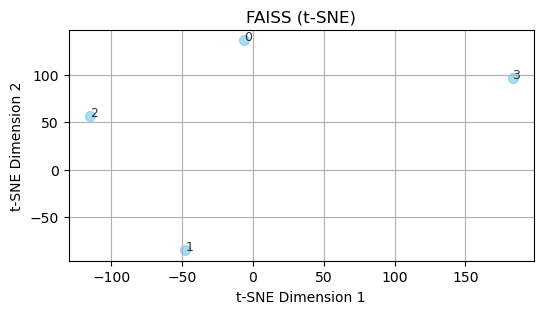

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

vectors = vector_db.index.reconstruct_n(0, vector_db.index.ntotal)
n_samples = len(vectors)
print(f"전체 문서 수: {n_samples}")
tsne = TSNE(n_components=2, perplexity=min(2, n_samples - 1), random_state=42, metric='cosine')
embeddings_2d = tsne.fit_transform(np.array(vectors))
plt.figure(figsize=(6, 3))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='skyblue', s=50, alpha=0.7)
for i, (x, y) in enumerate(embeddings_2d):
    plt.text(x, y, str(i), fontsize=9, alpha=0.8)
plt.title('FAISS (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

In [25]:
query1 = "8월에 출산 예정인 임산부가 있나요?"
docs = vector_db.similarity_search(query1)
print(textwrap.fill(str(docs[0].page_content), width=100, replace_whitespace=False))

담당의: ABC 의사
날짜: 2099년 7월 10일
환자 ID: 246813579
주 증상: 임신 정기 검진
현재 질환 이력:
환자 Emily Adams 씨(30세, 여성)는 정기
임신 검진을 위해 내원하였습니다. 현재 임신 32주차로, 2099년 8월 27일이 출산 예정일입니다. 기혼자로 남편과 함께 살고 있습니다.
진료 중 Adams 씨는 어머니가 임신
중 임신성 당뇨를 앓았던 가족력이 있다고 밝혔습니다. 본인은 중요한 병력이나 수술 경험, 이전 임신에서의 합병증은 없다고 합니다.
주 증상에 대해 Adams 씨는 임신 3기에 흔히
나타나는 요통, 잦은 소변, 가끔의 속쓰림 등의 불편함을 호소합니다. 질 출혈, 심한 복통, 태아 움직임의 특이한 변화는 없다고 합니다. 임신 중 전반적인 건강 관리를 위해 균형
잡힌 식단과 규칙적인 운동을 유지하고 있다고 합니다.
제공된 정보를 바탕으로 Adams 씨의 임신 경과를 확인하기 위한 정기 산전 검사가 진행될 예정입니다. 혈압, 체중 증가,
자궁저 높이 측정, 태아 심장 박동 모니터링 등을 평가할 것입니다. 건강한 출산과 순조로운 육아를 위해 출산 준비, 모유 수유, 산후 관리에 대한 상담도 함께 이루어질
예정입니다."


In [26]:
docs

[Document(id='2527746f-8ec8-4d8e-860a-148e0efe1178', metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='담당의: ABC 의사\n날짜: 2099년 7월 10일\n환자 ID: 246813579\n주 증상: 임신 정기 검진\n현재 질환 이력:\n환자 Emily Adams 씨(30세, 여성)는 정기 임신 검진을 위해 내원하였습니다. 현재 임신 32주차로, 2099년 8월 27일이 출산 예정일입니다. 기혼자로 남편과 함께 살고 있습니다.\n진료 중 Adams 씨는 어머니가 임신 중 임신성 당뇨를 앓았던 가족력이 있다고 밝혔습니다. 본인은 중요한 병력이나 수술 경험, 이전 임신에서의 합병증은 없다고 합니다.\n주 증상에 대해 Adams 씨는 임신 3기에 흔히 나타나는 요통, 잦은 소변, 가끔의 속쓰림 등의 불편함을 호소합니다. 질 출혈, 심한 복통, 태아 움직임의 특이한 변화는 없다고 합니다. 임신 중 전반적인 건강 관리를 위해 균형 잡힌 식단과 규칙적인 운동을 유지하고 있다고 합니다.\n제공된 정보를 바탕으로 Adams 씨의 임신 경과를 확인하기 위한 정기 산전 검사가 진행될 예정입니다. 혈압, 체중 증가, 자궁저 높이 측정, 태아 심장 박동 모니터링 등을 평가할 것입니다. 건강한 출산과 순조로운 육아를 위해 출산 준비, 모유 수유, 산후 관리에 대한 상담도 함께 이루어질 예정입니다."'),
 Document(id='b914260c-15a0-4a5f-aeec-fb7f7871909c', metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='담당의: ABC 의사\n날짜: 2099년 11월 15일\n환자 ID: 123456789\n주 증상: 피로감과 관절통\n현재 질환 이력:\n환자 Sarah Thompson 씨(57세, 여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 

In [27]:
query2 = "9월에 출산 예정인 임산부가 있나요?"
docs = vector_db.similarity_search(query2, k=1)
print(textwrap.fill(str(docs[0].page_content), width=100, replace_whitespace=False))

담당의: ABC 의사
날짜: 2099년 7월 10일
환자 ID: 246813579
주 증상: 임신 정기 검진
현재 질환 이력:
환자 Emily Adams 씨(30세, 여성)는 정기
임신 검진을 위해 내원하였습니다. 현재 임신 32주차로, 2099년 8월 27일이 출산 예정일입니다. 기혼자로 남편과 함께 살고 있습니다.
진료 중 Adams 씨는 어머니가 임신
중 임신성 당뇨를 앓았던 가족력이 있다고 밝혔습니다. 본인은 중요한 병력이나 수술 경험, 이전 임신에서의 합병증은 없다고 합니다.
주 증상에 대해 Adams 씨는 임신 3기에 흔히
나타나는 요통, 잦은 소변, 가끔의 속쓰림 등의 불편함을 호소합니다. 질 출혈, 심한 복통, 태아 움직임의 특이한 변화는 없다고 합니다. 임신 중 전반적인 건강 관리를 위해 균형
잡힌 식단과 규칙적인 운동을 유지하고 있다고 합니다.
제공된 정보를 바탕으로 Adams 씨의 임신 경과를 확인하기 위한 정기 산전 검사가 진행될 예정입니다. 혈압, 체중 증가,
자궁저 높이 측정, 태아 심장 박동 모니터링 등을 평가할 것입니다. 건강한 출산과 순조로운 육아를 위해 출산 준비, 모유 수유, 산후 관리에 대한 상담도 함께 이루어질
예정입니다."


In [28]:
docs

[Document(id='2527746f-8ec8-4d8e-860a-148e0efe1178', metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='담당의: ABC 의사\n날짜: 2099년 7월 10일\n환자 ID: 246813579\n주 증상: 임신 정기 검진\n현재 질환 이력:\n환자 Emily Adams 씨(30세, 여성)는 정기 임신 검진을 위해 내원하였습니다. 현재 임신 32주차로, 2099년 8월 27일이 출산 예정일입니다. 기혼자로 남편과 함께 살고 있습니다.\n진료 중 Adams 씨는 어머니가 임신 중 임신성 당뇨를 앓았던 가족력이 있다고 밝혔습니다. 본인은 중요한 병력이나 수술 경험, 이전 임신에서의 합병증은 없다고 합니다.\n주 증상에 대해 Adams 씨는 임신 3기에 흔히 나타나는 요통, 잦은 소변, 가끔의 속쓰림 등의 불편함을 호소합니다. 질 출혈, 심한 복통, 태아 움직임의 특이한 변화는 없다고 합니다. 임신 중 전반적인 건강 관리를 위해 균형 잡힌 식단과 규칙적인 운동을 유지하고 있다고 합니다.\n제공된 정보를 바탕으로 Adams 씨의 임신 경과를 확인하기 위한 정기 산전 검사가 진행될 예정입니다. 혈압, 체중 증가, 자궁저 높이 측정, 태아 심장 박동 모니터링 등을 평가할 것입니다. 건강한 출산과 순조로운 육아를 위해 출산 준비, 모유 수유, 산후 관리에 대한 상담도 함께 이루어질 예정입니다."')]

In [29]:
len(docs)

1

In [30]:
query3 = "최근에 여행을 다녀온 환자는 누구인가요?"
docs = vector_db.similarity_search(query3)
print(textwrap.fill(str(docs[0].page_content), width=100, replace_whitespace=False))

담당의: ABC 의사
날짜: 2099년 11월 15일
환자 ID: 123456789
주 증상: 피로감과 관절통
현재 질환 이력:
환자 Sarah Thompson 씨(57세,
여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 거주 중인 미망인으로, 최근 해외여행 이력은 없습니다.
진료 중 Thompson 씨는 자매가 류마티스 관절염 진단을 받은
자가면역 질환 가족력이 있다고 밝혔습니다. 또한 본인은 갑상선 기능 저하증이 있어 갑상선 호르몬 대체 요법으로 관리 중이라고 합니다.
주 증상에 대해 Thompson 씨는 일상
활동에 지장을 줄 정도로 지속적이고 심한 피로감을 느끼며, 그 정도는 10점 만점에 8점이라고 표현했습니다. 또한 주로 무릎과 손목에 관절통이 있는데, 아침에 더 심하고 하루 중
활동하면서 점차 나아진다고 합니다. 관절 부위의 붓기나 붉어짐은 없다고 합니다.
임상 소견을 바탕으로 Thompson 씨의 피로감과 관절통의 원인을 찾기 위한 추가 검사가
필요합니다. 혈액 검사, 영상 검사 및 필요시 전문의 상담을 진행할 예정입니다."


In [31]:
docs

[Document(id='b914260c-15a0-4a5f-aeec-fb7f7871909c', metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='담당의: ABC 의사\n날짜: 2099년 11월 15일\n환자 ID: 123456789\n주 증상: 피로감과 관절통\n현재 질환 이력:\n환자 Sarah Thompson 씨(57세, 여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 거주 중인 미망인으로, 최근 해외여행 이력은 없습니다.\n진료 중 Thompson 씨는 자매가 류마티스 관절염 진단을 받은 자가면역 질환 가족력이 있다고 밝혔습니다. 또한 본인은 갑상선 기능 저하증이 있어 갑상선 호르몬 대체 요법으로 관리 중이라고 합니다.\n주 증상에 대해 Thompson 씨는 일상 활동에 지장을 줄 정도로 지속적이고 심한 피로감을 느끼며, 그 정도는 10점 만점에 8점이라고 표현했습니다. 또한 주로 무릎과 손목에 관절통이 있는데, 아침에 더 심하고 하루 중 활동하면서 점차 나아진다고 합니다. 관절 부위의 붓기나 붉어짐은 없다고 합니다.\n임상 소견을 바탕으로 Thompson 씨의 피로감과 관절통의 원인을 찾기 위한 추가 검사가 필요합니다. 혈액 검사, 영상 검사 및 필요시 전문의 상담을 진행할 예정입니다."'),
 Document(id='2a487f66-9759-405a-b407-37bd66f081e5', metadata={'source': 'mocked_up_physician_records_ko.csv'}, page_content='담당의: ABC 의사\n날짜: 2099년 6월 25일\n환자 ID: 987654321\n주 증상: 복통\n현재 질환 이력:\n환자 John Anderson 씨(42세, 남성)는 복통을 주 증상으로 내원하였습니다. 기혼자로 아내와 두 자녀와 함께 살고 있습니다. Anderson 씨는 약 2주 전 유럽 출장에서 돌아왔으며, 여행 중 호흡기 증상이나 아픈 사람

In [32]:
query4 = "검사실 검사가 필요한 환자는 누구인가요?"
docs = vector_db.similarity_search(query4)
print(textwrap.fill(str(docs[0].page_content), width=100, replace_whitespace=False))

담당의: ABC 의사
날짜: 2099년 11월 15일
환자 ID: 123456789
주 증상: 피로감과 관절통
현재 질환 이력:
환자 Sarah Thompson 씨(57세,
여성)는 피로감과 관절통을 호소하며 내원하였습니다. 홀로 거주 중인 미망인으로, 최근 해외여행 이력은 없습니다.
진료 중 Thompson 씨는 자매가 류마티스 관절염 진단을 받은
자가면역 질환 가족력이 있다고 밝혔습니다. 또한 본인은 갑상선 기능 저하증이 있어 갑상선 호르몬 대체 요법으로 관리 중이라고 합니다.
주 증상에 대해 Thompson 씨는 일상
활동에 지장을 줄 정도로 지속적이고 심한 피로감을 느끼며, 그 정도는 10점 만점에 8점이라고 표현했습니다. 또한 주로 무릎과 손목에 관절통이 있는데, 아침에 더 심하고 하루 중
활동하면서 점차 나아진다고 합니다. 관절 부위의 붓기나 붉어짐은 없다고 합니다.
임상 소견을 바탕으로 Thompson 씨의 피로감과 관절통의 원인을 찾기 위한 추가 검사가
필요합니다. 혈액 검사, 영상 검사 및 필요시 전문의 상담을 진행할 예정입니다."
